In [13]:
!pip install pandas numpy scipy statsmodels matplotlib seaborn

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [24]:
df = pd.read_csv("pokemon_data.csv")
print(df.head())

   Number        Name Type 1  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0       1   Bulbasaur  Grass  45      49       49       65       65     45   
1       2     Ivysaur  Grass  60      62       63       80       80     60   
2       3    Venusaur  Grass  80      82       83      100      100     80   
3       4  Charmander   Fire  39      52       43       60       50     65   
4       5  Charmeleon   Fire  58      64       58       80       65     80   

   Total  
0    318  
1    405  
2    525  
3    309  
4    405  


In [16]:
df_cleaned = df.dropna()
print("Number of data points after cleaning:", len(df_cleaned))

Number of data points after cleaning: 151


In [17]:
z_scores = np.abs(stats.zscore(df['Total']))
df_no_outliers = df[z_scores < 3]

In [18]:
hp = df_cleaned['HP'].values

print("Mean HP:", np.mean(hp))
print("Standard Deviation HP:", np.std(hp))
print("Max HP:", np.max(hp))
print("Min HP:", np.min(hp))
print("Median HP:", np.median(hp))
print("\nOutliers:\n", df_no_outliers)

Mean HP: 64.21192052980132
Standard Deviation HP: 28.49529048378475
Max HP: 250
Min HP: 10
Median HP: 60.0

Outliers:
      Number        Name   Type 1   HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         1   Bulbasaur    Grass   45      49       49       65       65   
1         2     Ivysaur    Grass   60      62       63       80       80   
2         3    Venusaur    Grass   80      82       83      100      100   
3         4  Charmander     Fire   39      52       43       60       50   
4         5  Charmeleon     Fire   58      64       58       80       65   
..      ...         ...      ...  ...     ...      ...      ...      ...   
146     147     Dratini   Dragon   41      64       45       50       50   
147     148   Dragonair   Dragon   61      84       65       70       70   
148     149   Dragonite   Dragon   91     134       95      100      100   
149     150      Mewtwo  Psychic  106     110       90      154       90   
150     151         Mew  Psychic  100     100

In [19]:
corr, p_val = pearsonr(df_cleaned['Attack'], df_cleaned['Speed'])
print(f"Pearson correlation between Attack and Speed: {corr:.2f} (p={p_val:.4f})")
corr, p_val = pearsonr(df_cleaned['HP'], df_cleaned['Defense'])
print(f"Pearson correlation between HP and Defense: {corr:.2f} (p={p_val:.4f})")

Pearson correlation between Attack and Speed: 0.20 (p=0.0135)
Pearson correlation between HP and Defense: 0.12 (p=0.1429)


In [20]:
correlation_matrix = df_cleaned[['HP', 'Sp. Def','Attack','Speed']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                HP   Sp. Def    Attack     Speed
HP       1.000000  0.493723  0.297665 -0.041245
Sp. Def  0.493723  1.000000  0.369362  0.387824
Attack   0.297665  0.369362  1.000000  0.200549
Speed   -0.041245  0.387824  0.200549  1.000000


In [21]:
X = df_cleaned['Attack']
y = df_cleaned['Speed']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.244
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0135
Time:                        22:59:56   Log-Likelihood:                -708.47
No. Observations:                 151   AIC:                             1421.
Df Residuals:                     149   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2861      6.298      8.620      0.0

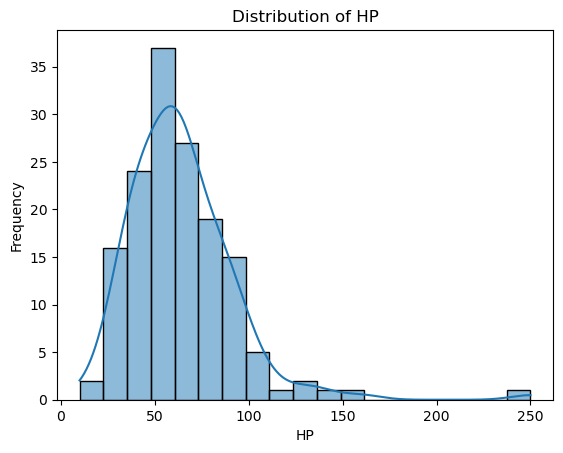

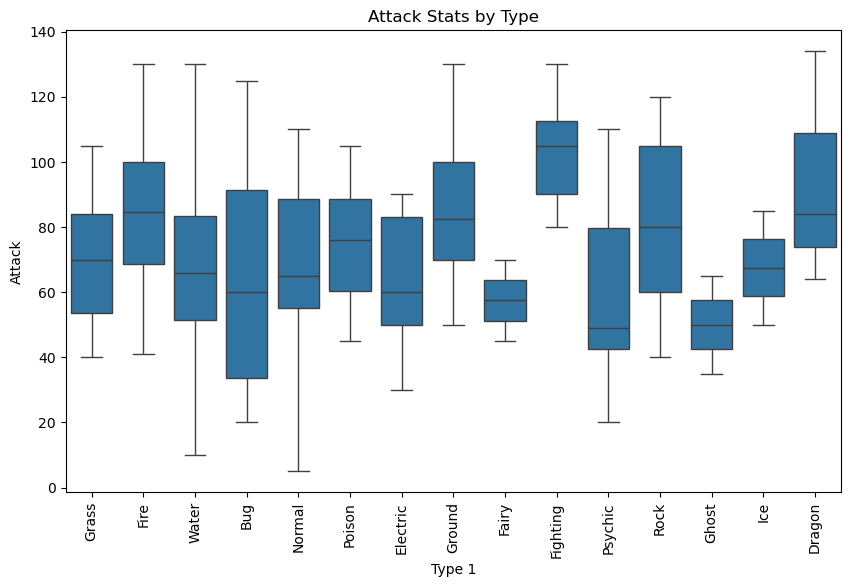

In [22]:
#Histogram of HP
sns.histplot(df_cleaned['HP'], kde=True)
plt.title("Distribution of HP")
plt.xlabel("HP")
plt.ylabel("Frequency")
plt.show()

#Boxplot of Attack by Type 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Type 1', y='Attack')
plt.xticks(rotation=90)
plt.title("Attack Stats by Type")
plt.show()

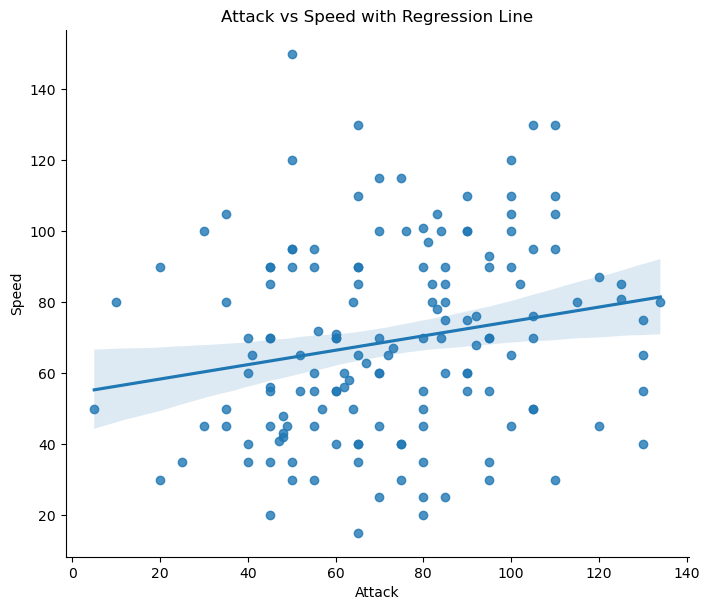

In [23]:
#Scatterplot with regression line
sns.lmplot(data=df_cleaned, x='Attack', y='Speed', height=6, aspect=1.2)
plt.title("Attack vs Speed with Regression Line")
plt.show()